# Car price Prediction

In [1]:
import pandas as pd
import numpy as np


##### This function will download the dataset into your browser

In [2]:
# from pyodide.http import pyfetch
# async def download(url,filename):
#     response= await pyfetch(url)
#     if response.status == 200:
#         with open(filename, 'wb') as f:
#             f.write(await response.byte()

## Read Data

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
import pandas as pd
df=pd.read_csv(path,header=None)

#### print the first 5 rows

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### check the bottom 10 rows of the data frame

In [6]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Add Headers

In [7]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns= headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Replace ? symbol with NaN with replace() so that dropna() can remove the missing values

In [8]:
df.replace('?',np.NaN, inplace=True)


## Evaluating missing values

In [9]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Count missing values in each column
# True means value is a missing value and False means value is not a missing value ie present

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## dealing with missing values
<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [14]:
avg_norm_loss =df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [15]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [17]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [18]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>


In [19]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("average of bore:", avg_bore)

average of bore: 3.3297512437810943


<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [20]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<h4> replace NaN in "stroke" column with the mean value</h4>

In [21]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print('Average of stroke:', avg_stroke)

df['stroke'].replace(np.nan, avg_stroke, inplace=True)

Average of stroke: 3.255422885572139


<h4> mean value of "horsepower" column and replace it with nan

In [22]:
avg_horsepower= df['horsepower'].astype('float').mean(axis=0)
print("average of horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace= True)

average of horsepower: 104.25615763546799


<h4> mean values for "peak-rpm" column

In [23]:
avg_peak_rpm= df['peak-rpm'].astype('float').mean(axis=0)
print('average of peak-rpm:',avg_peak_rpm)

df['peak-rpm'].fillna(avg_peak_rpm,inplace=True)

average of peak-rpm: 5125.369458128079


In [24]:
df['peak-rpm'].isnull().sum()

0

<h4> to see unique values present in a praticular column we use "value_counts()" method

In [25]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

<h4>to find the max of unique values we use ".idxmax()", this find the most common automatically

In [26]:
df['num-of-doors'].value_counts().idxmax()

'four'

<h4> replace the missing "num-of-doors" values by the most frequent

In [27]:
df['num-of-doors'].fillna("four", inplace=True)
df['num-of-doors'].isnull().sum()

0

<h4> drop all the rows that donot have price data

In [28]:
df.dropna(subset=['price'],axis=0,inplace=True)
#reset the index, because we droped some rows
df.reset_index(drop=True, inplace=True)

In [29]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [31]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h5>Convert data types to proper format

In [32]:
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")
df[["price"]]=df[["price"]].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")

In [33]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>



In [34]:
# droping a column 
# df.drop('normalised-losses',axis=1,inplace=True)
# df.head()


In [35]:
#Convert mpg to L/100km by mathematical operation(235 divided by mpg)
df['city-L/100km']= 235/df['city-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [36]:
df['highway-mpg']=235/df["highway-mpg"]

df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [37]:

df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the c variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0-1.</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [38]:
# replace (original value) by (original value)/maximum value)

df['length']= df['length']/df['length'].max()
df['width']= df['width']/df['width'].max()
df['height']= df['height']/df['height'].max()

df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [39]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 201 entries, 0 to 200
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [40]:
# convert to correct data format

df["horsepower"] = df["horsepower"].astype(int, copy=True)

# copy= True returns a new dataframe with the specific data type conversion, leaveing the original dataframe unchanged

Text(0.5, 0, 'horsepower bins')

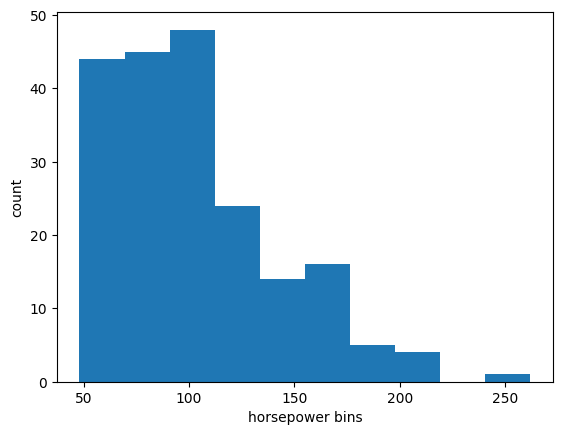

In [41]:
# lets plot a histogram of horsepower to see what the distribution of horsepower looks like
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'])

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.xlabel('horsepower bins')

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


In [42]:
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [43]:
# we set group names
group_names= ['Low','Medium','High']

In [44]:
# apply "cut" fuction to determine what each value of df['horsepower'] belongs to

df['horsepower-binned']= pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [45]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

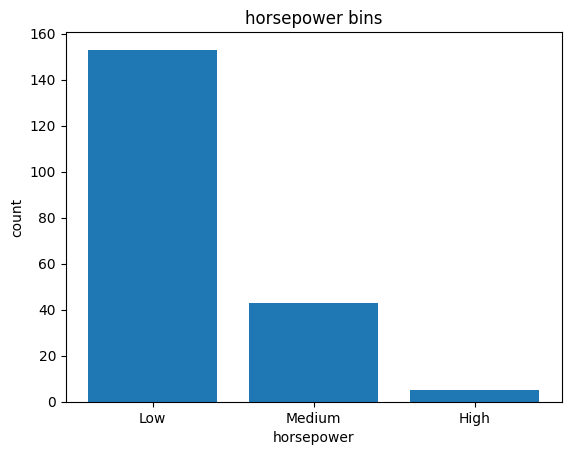

In [46]:
# bar plot to show the distribution of each bin

pyplot.bar(group_names,df['horsepower-binned'].value_counts())

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bins')

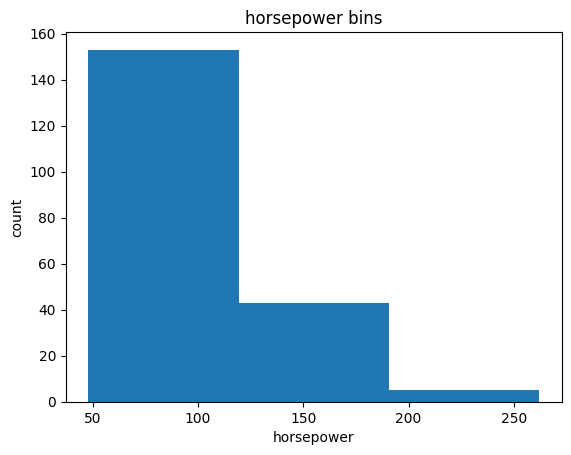

In [47]:
#bin visualization

plt.pyplot.hist(df['horsepower'],bins=3)

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [48]:
dummy_variable_1= pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [49]:
#change column name for clarity

dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [50]:
#merge data frame df and dummy_variable_1

df=pd.concat([df,dummy_variable_1],axis=1)

#drop the original column
df.drop("fuel-type", axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int32   
 2   make               201 non-null    object  
 3   aspiration         201 non-null    object  
 4   num-of-doors       201 non-null    object  
 5   body-style         201 non-null    object  
 6   drive-wheels       201 non-null    object  
 7   engine-location    201 non-null    object  
 8   wheel-base         201 non-null    float64 
 9   length             201 non-null    float64 
 10  width              201 non-null    float64 
 11  height             201 non-null    float64 
 12  curb-weight        201 non-null    int64   
 13  engine-type        201 non-null    object  
 14  num-of-cylinders   201 non-null    object  
 15  engine-size        201 non-null    int64   
 16  fuel-sys

In [52]:
df['aspiration'].value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [53]:
#indicator variables for aspiration column

dummies_1= pd.get_dummies(df['aspiration'])
dummies_1.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
df=pd.concat([df,dummies_1],axis=1)
df.drop('aspiration',axis=1,inplace=True)


# Sava Dataset

In [54]:
df.to_csv("automobile_clean_data.csv")

## Check Data types

In [55]:
df.shape

(201, 30)

In [56]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-L/100km       float64
price                 float64
city-L/100km          float64
horsepower-binned    category
fuel-type-diesel         bool
fuel-type-gas            bool
aspiration-std           bool
aspiration-turbo         bool
dtype: object

# Data Analysis

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df['peak-rpm'].dtypes

dtype('float64')

<h4> we can calculate the correlation between variables of type "int64" or "float64" using the method "corr"

In [59]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>

<h3>Positive Linear Relationship</h4>

Let's find the scatterplot of "engine-size" and "price".



(0.0, 53333.159743910684)

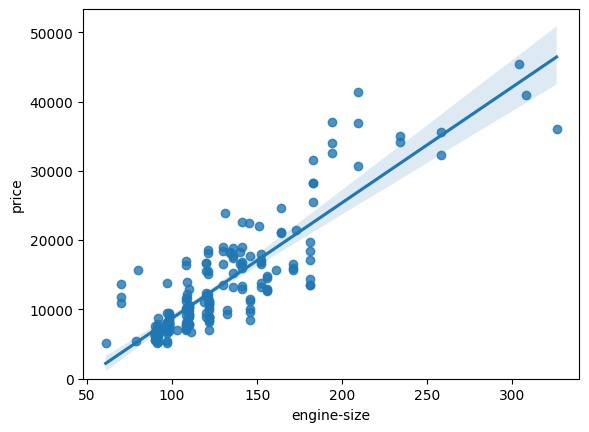

In [60]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


In [61]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


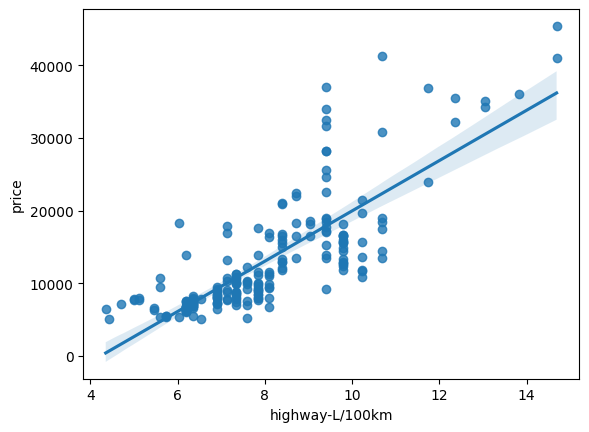

In [62]:
sns.regplot(x="highway-L/100km",y='price',data=df)
df[['highway-L/100km','price']].corr()

<h3>Weak Linear Relationship</h3>


check if peak-rpm is a predictior variable of price

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


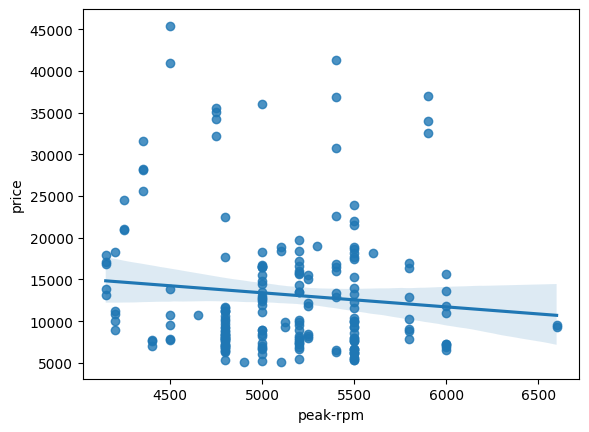

In [63]:
sns.regplot(x='peak-rpm', y='price',data=df)
df[['peak-rpm','price']].corr()

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


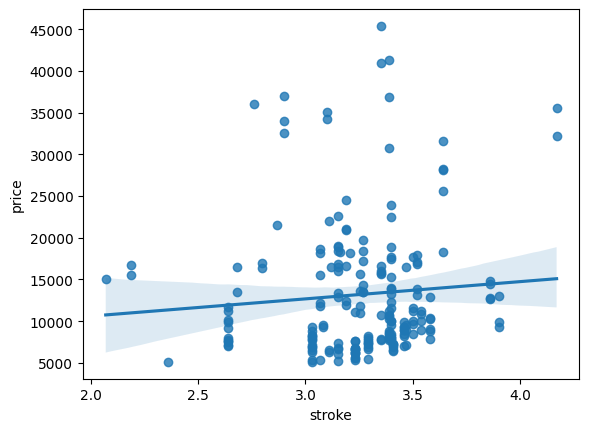

In [64]:
# correlation between stroke and price

sns.regplot(x='stroke',y='price',data=df)
df[['stroke','price']].corr()

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


<Axes: xlabel='body-style', ylabel='price'>

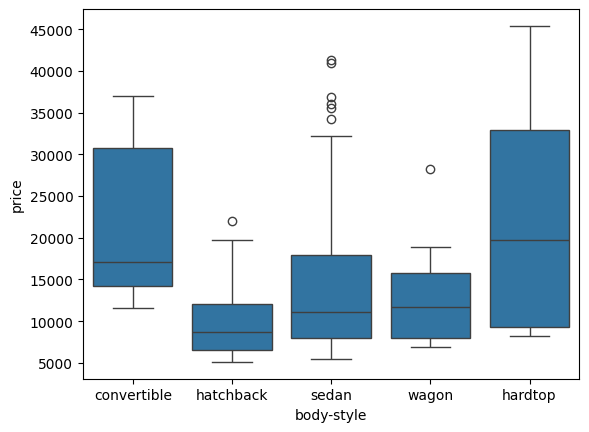

In [65]:
# relationship between body style and price

sns.boxplot(x='body-style',y='price',data=df)


<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

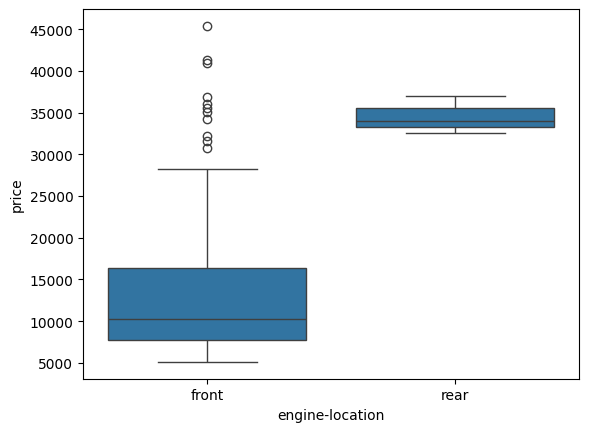

In [66]:
sns.boxplot(x='engine-location',y='price',data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


<Axes: xlabel='drive-wheels', ylabel='price'>

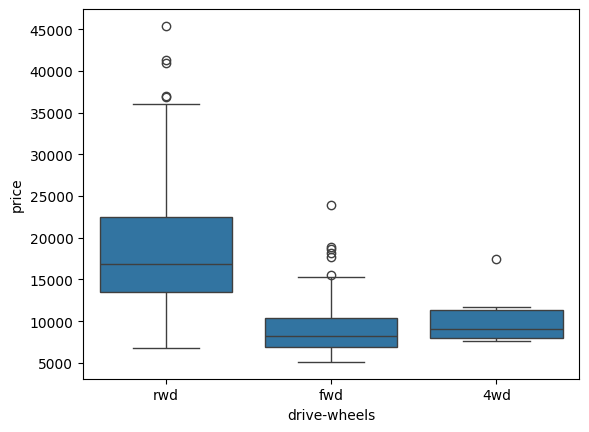

In [67]:
# examine drive-wheels

sns.boxplot(x='drive-wheels',y='price',data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>
<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [68]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [69]:
#to show object variables

df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [70]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [71]:
# we can convert this series to a data frame

df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [72]:
df['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>
<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>
<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [73]:
df_group_1=df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [74]:
nan=df['price'].isna().sum()
print(nan)

0


In [75]:
print(df_group_1.dtypes)

drive-wheels     object
body-style       object
price           float64
dtype: object


In [76]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [77]:
print(df_gptest.dtypes)

drive-wheels     object
body-style       object
price           float64
dtype: object


In [78]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [79]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [80]:
df_gptest2= df[['body-style','price']]
grouped_test_bodystyle= df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


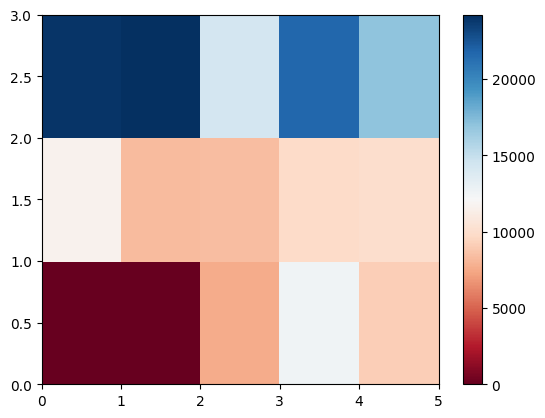

In [81]:
#body style vs price heat map
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

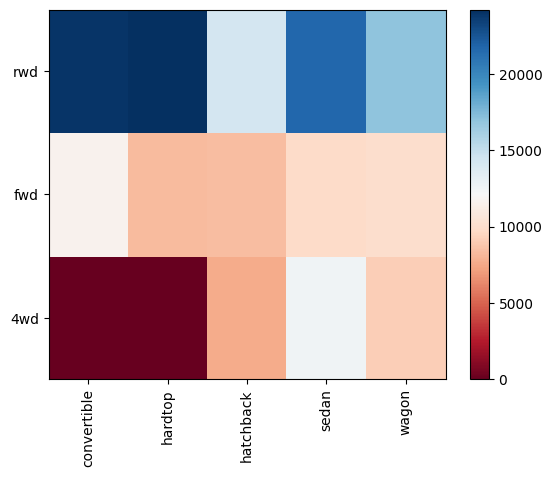

In [82]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h1> Correlation and Causation</h1><br>

<h3>Corrlation:</h3> A measure of the enxtend of interdependence between variables.<br>
<h3>Causation:</h3> The ralationship between cause and effect betten two variables.<br>

Correlation does not imply causation. Determining correlation is much simpler then determining causation as causation may require independent experimentation.

<h3>Pearson Correlation</h3>

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:
    <li><b>1:</b>Perfect positive linear correlation</li></li>
    <li><b>0:</b>No linear correlation, the two varibles most likely do not affect each other</li>
    <li><b>-1:</b>Perfect negative linear correlation.</li><br>

Pearson Correlation is the default method of the fucntion "corr".Like before, we can calculate the Pearson Correlation of the 'int64' or 'float64' variables.

Sometimes we would like to know the significant of the correlation estimate.

<b>P-value</b>
<p>What is P-value? The P-value is the probability value that the correlation between these two variables is statistically significant.Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
<li>P-value is <$0.001: we say there is a strong evidence that the correlation is significent.</li>
<li>P-value < 0.05: there is moderate evidence that the correlation is significant.</li>
<li>P-value < 0.1: there is no evidence that the correlation is significant.</li>


We can obtain this info using "stats" module in the "scipy" libraby

In [83]:
from scipy import stats

In [84]:
# wheel-base vs price

pearson_coef,p_value= stats.pearsonr(df['wheel-base'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.584641822265508 p-value is 8.076488270732947e-20


<h2>Pearson Correlation coefficient and P-value of "horsepower" and 'price'. 

In [85]:
pearson_coef, p_value= stats.pearsonr(df['horsepower'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.8096068016571054 p-value is 6.273536270650436e-48


p-value is < 0.001 the correlation is statistically significant and the linear relationship is quite strong(~0.809)

In [86]:
# length vs Price

pearson_coef, p_value= stats.pearsonr(df['length'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.6906283804483639 p-value is 8.016477466159153e-30


p-value is < 0.001 the correlation is statistically significant and the linear relationship is moderately strong(~0.69)

In [87]:
# width vs price

pearson_coef,p_value=stats.pearsonr(df['width'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.7512653440522672 p-value is 9.200335510482065e-38


In [88]:
# curb-weight vs price

pearson_coef,p_value=stats.pearsonr(df['curb-weight'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.8344145257702843 p-value is 2.189577238893972e-53


In [89]:
#Engine-size vs price
pearson_coef,p_value=stats.pearsonr(df['engine-size'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.8723351674455182 p-value is 9.265491622200262e-64


In [90]:
#bore vs price

pearson_coef,p_value= stats.pearsonr(df['bore'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.5431553832626603 p-value is 8.04918948393533e-17


In [91]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [92]:
#city-L/100km vs price

pearson_coef,p_value=stats.pearsonr(df['city-L/100km'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.7898975136626943 p-value is 3.903106400939397e-44


In [93]:
#Highway-L/100km vs price

pearson_coef, p_value= stats.pearsonr(df['highway-L/100km'],df['price'])
print('Pearson Correlation Coefficent is', pearson_coef,'p-value is',p_value)

Pearson Correlation Coefficent is 0.8011176263981973 p-value is 3.046784581041407e-46


# ANOVA

<h1>ANOVA: Analysis of Variance</h1>

<p>The Analysis of Variance is a statistical method used to test whether there are significant differences between the means of two or more groups.

ANOVA returns two parameters:

<b>F-test score:</b><p>ANOVA assumes the means of all groups are the same, how much the actual means deviate from the assumption, and reports it as the F-test score. A large score means there is a larger difference between the means.</p>

<b>P-value:</b><p>P-value tells how statistically significant our calculated score value is.</p>

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return sizeable F-score and a small P-value



In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int32   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand. </p>

In [95]:
# See if different types of 'drive-wheel' impact the 'price'

grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [96]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [97]:
grouped_test2.get_group("4wd")['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [98]:
#ANOVA, we use the function f_oneway() in the module stats to obtain the F-test score and the p-value
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'],grouped_test2.get_group('rwd')['price'],grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F=",f_val,"P=",p_val)

ANOVA results: F= 67.95406500780399 P= 3.3945443577149576e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.



In [99]:
#fwd and rwd
f_val, p_val= stats.f_oneway(grouped_test2.get_group('fwd')['price'],grouped_test2.get_group('rwd')['price'])
print("F=",f_val,"P=",p_val)

F= 130.5533160959111 P= 2.2355306355677366e-23


In [100]:
#4wd vs rwd
f_val, p_val=stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('rwd')['price'])
print("F=",f_val,"P=",p_val)

F= 8.580681368924756 P= 0.004411492211225367


In [101]:
#4wd and fwd
f_val, p_val=stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('fwd')['price'])
print("F=",f_val,"P=",p_val)

F= 0.665465750252303 P= 0.4162011669784502


<h3>Conclusion: Important Variables</h3>
<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


<h1>Model Development</h1>

<h2>1. Linear Regression and Multiple Linear Regression</h2>
<h4>Linear Regression</h4>
<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$
<b>Linear Function</b>
$$
Yhat = a + b  X
$$
<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [102]:
from sklearn.linear_model import LinearRegression

lm= LinearRegression()

#predict the price with highway-l/100km

X= df[['highway-L/100km']]
Y=df['price']

lm.fit(X,Y)

Yhat= lm.predict(X)
print("Yhat:",Yhat[0:5])# shows the first 5 prediction

# value of intercept(a)
print("intercept(a):",lm.intercept_)
print("slope(b):",lm.coef_)

Yhat: [15485.52737455 15485.52737455 16643.34931414 12475.19033163
 22327.2024721 ]
intercept(a): -14617.843054664598
slope(b): [3458.68511314]


In [103]:
#use engine-size to predict the price

lm2=LinearRegression()

X=df[['engine-size']]
Y=df['price']

lm2.fit(X,Y)

Yhat2=lm2.predict(X)
print("Yhat:",Yhat2[0:5])
print("intercept:",lm2.intercept_)
print("slope:",lm2.coef_)





Yhat: [13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]
intercept: -7963.338906281024
slope: [166.86001569]


<h4>Multiple Linear Regression</h4>
<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>
$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$
$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$
The equation is given by:
$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$
<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [104]:
Z= df[['horsepower','curb-weight','engine-size','highway-L/100km','normalized-losses']]

lm.fit(Z,df['price'])

yhat=lm.predict(Z)
yhat[0:5]

array([14052.58010701, 14052.58010701, 18630.4615806 , 10786.90567567,
       16696.38676107])

we can find intercept and slope the same way


<h2>2. Model Evaluation Using Visualization</h2>
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


In [105]:
#import the visalization packages :seaborn

import seaborn as sns

<h3>Regression Plot</h3>
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>
Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 47715.274600971396)

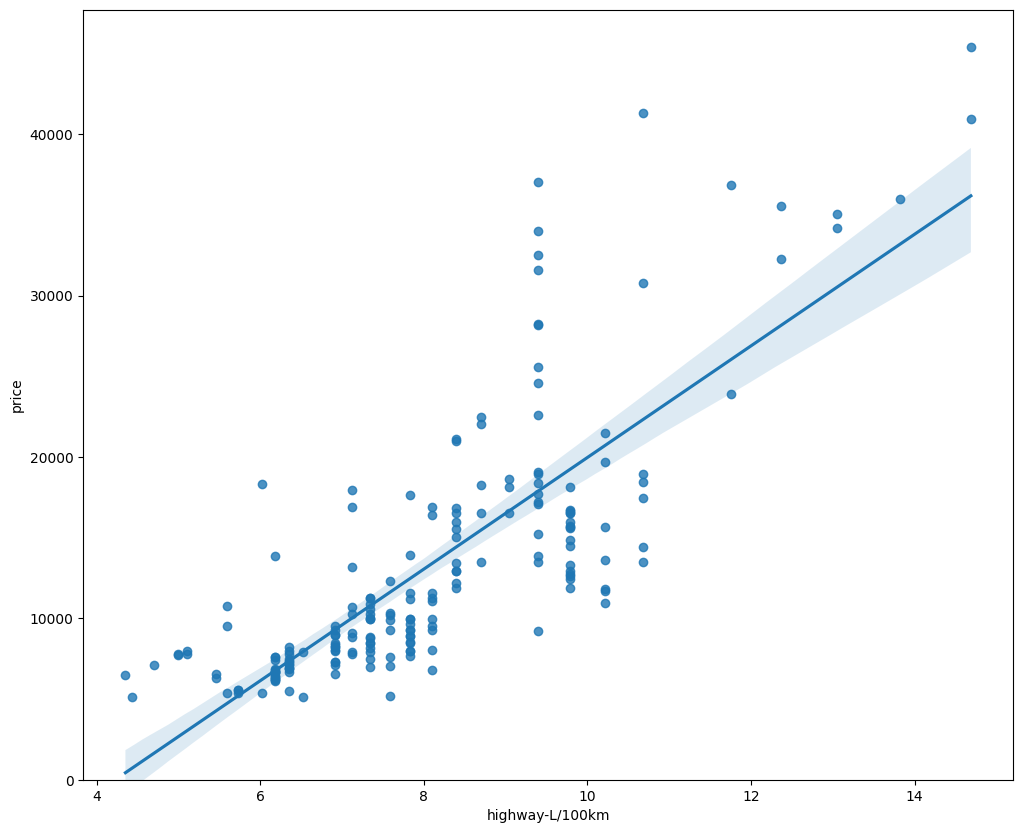

In [106]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-L/100km',y='price',data=df)
plt.ylim(0,)

(0.0, 47717.35430696892)

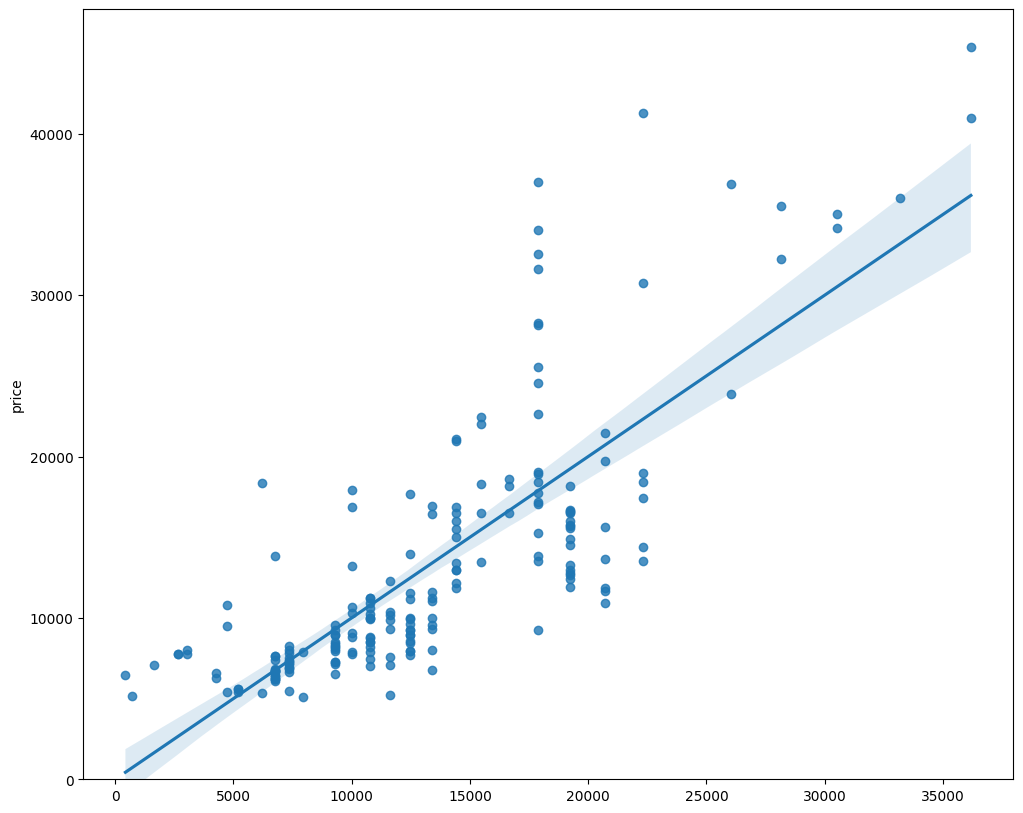

In [107]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x=Yhat,y='price',data=df)
plt.ylim(0,)

Text(0.5, 0, 'predicted price')

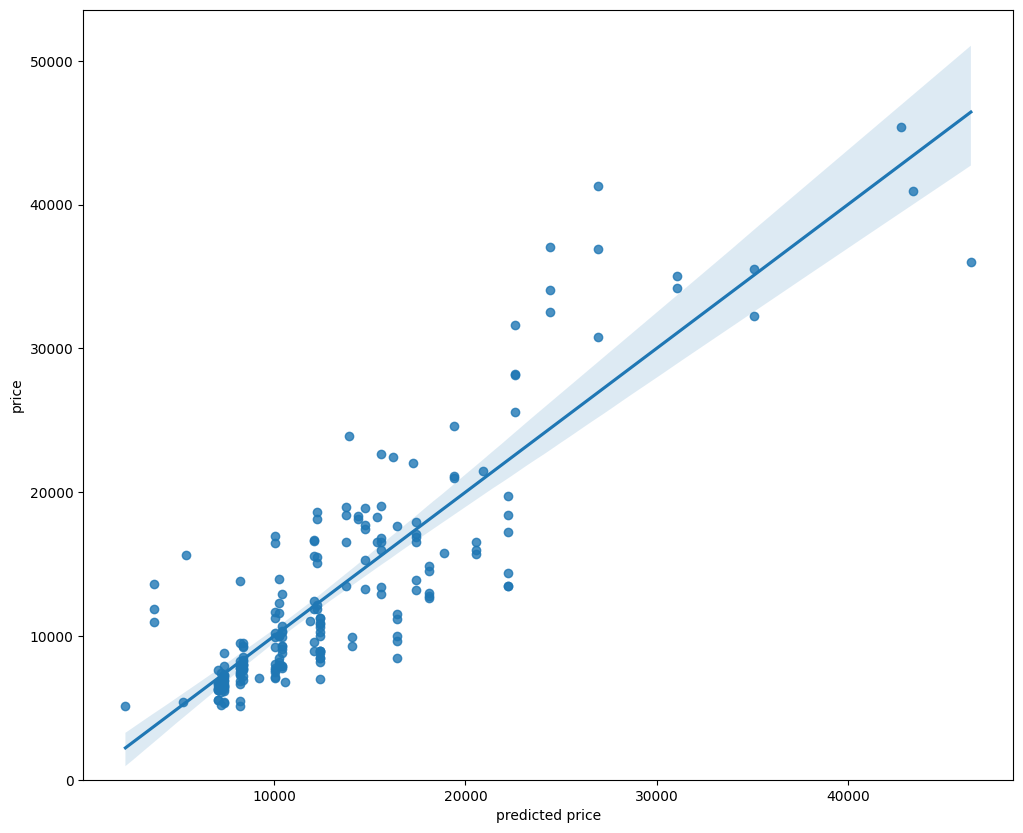

In [108]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x=Yhat2,y='price',data=df)
plt.ylim(0,)
plt.xlabel('predicted price')

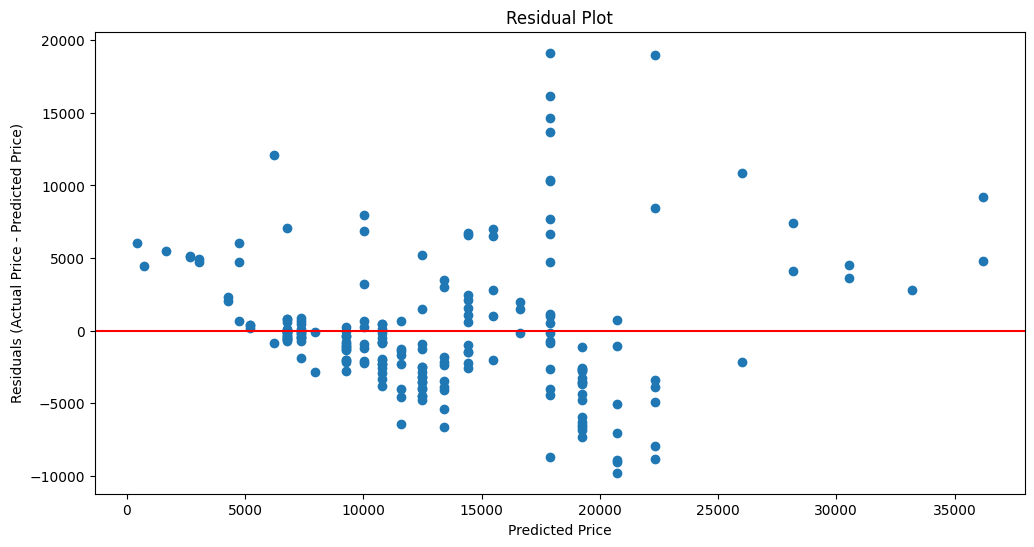

In [109]:
import matplotlib.pyplot as plt

# Calculate the residuals (the difference between actual and predicted prices)
residuals = Y - Yhat

# Create a scatterplot or residual plot
plt.figure(figsize=(12, 6))
plt.scatter(Yhat, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual Price - Predicted Price)")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()


(0.0, 47414.1)

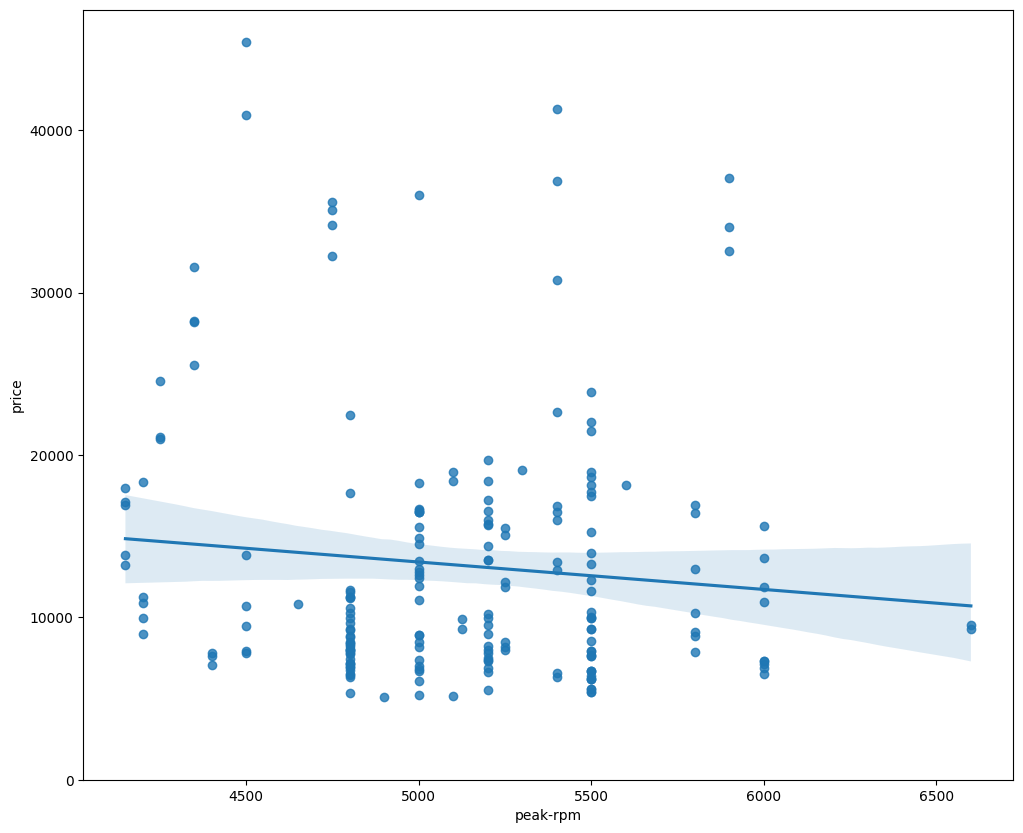

In [110]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

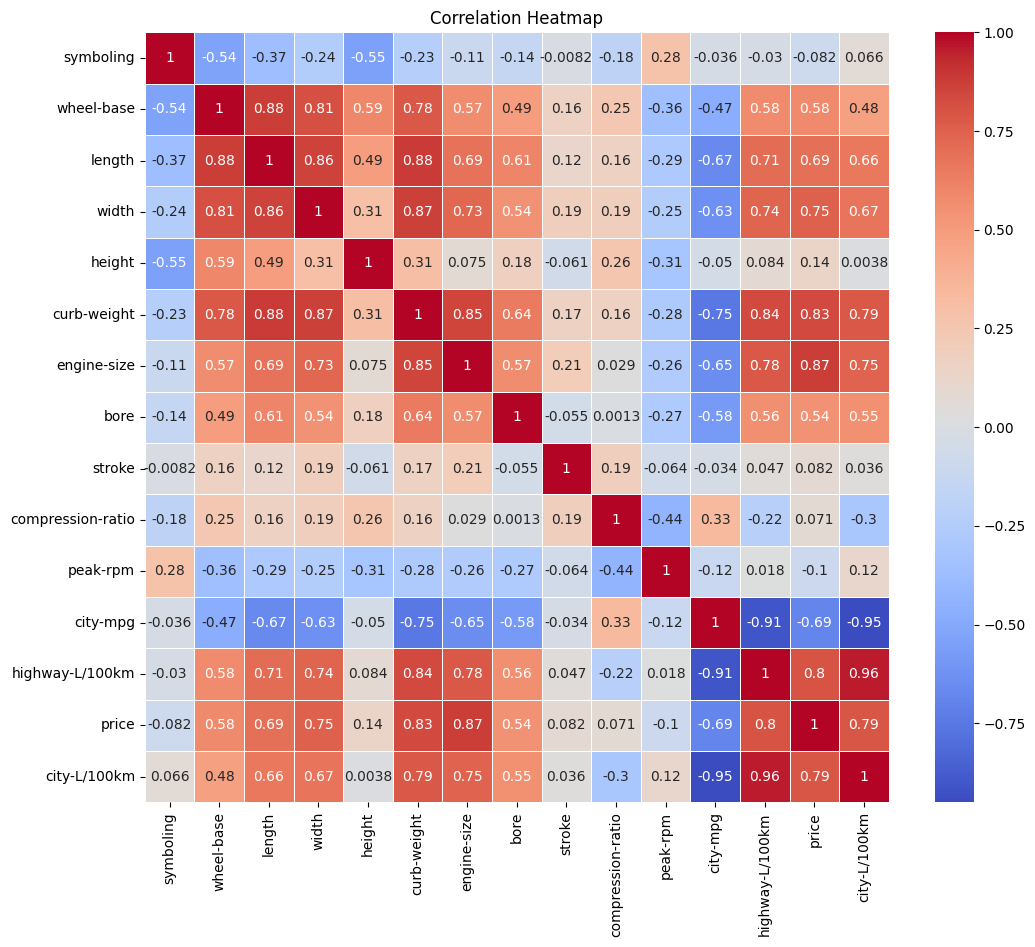

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only the columns with int64 and float64 data types
selected_cols= df.select_dtypes(include=['int64','float64'])
# Calculate the correlation matrix
corr_matrix = selected_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<h1>Correlation to price with multiple variables

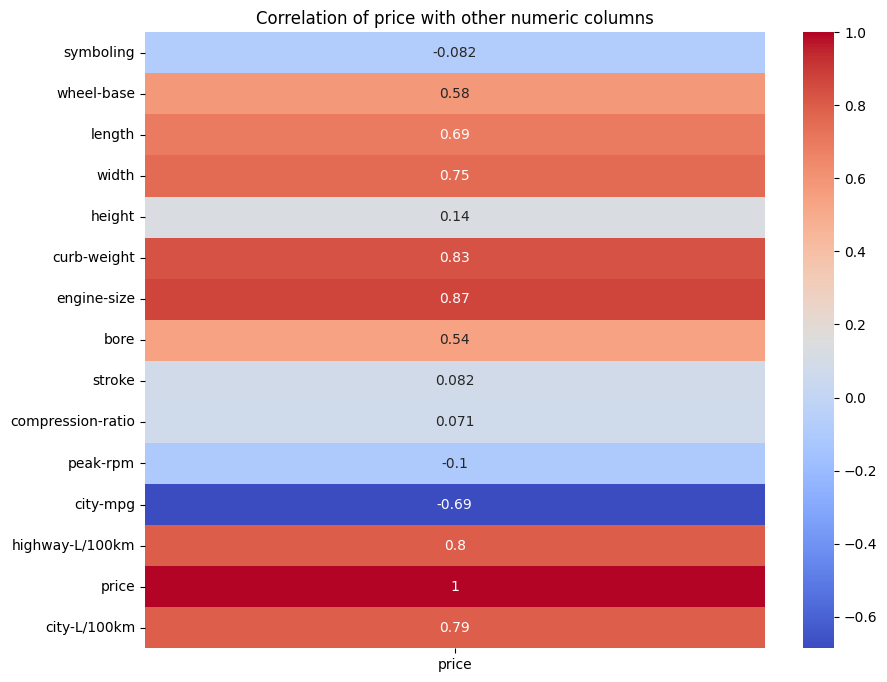

In [112]:


# Select the column for which you want to find correlations
target_column = 'price'  # Replace with the actual column name

# Filter only the numeric columns (int64 and float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns.columns].corr()

# Filter correlations with the target column
correlations_with_target = correlation_matrix[target_column]

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm')
plt.title(f'Correlation of {target_column} with other numeric columns')
plt.show()


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


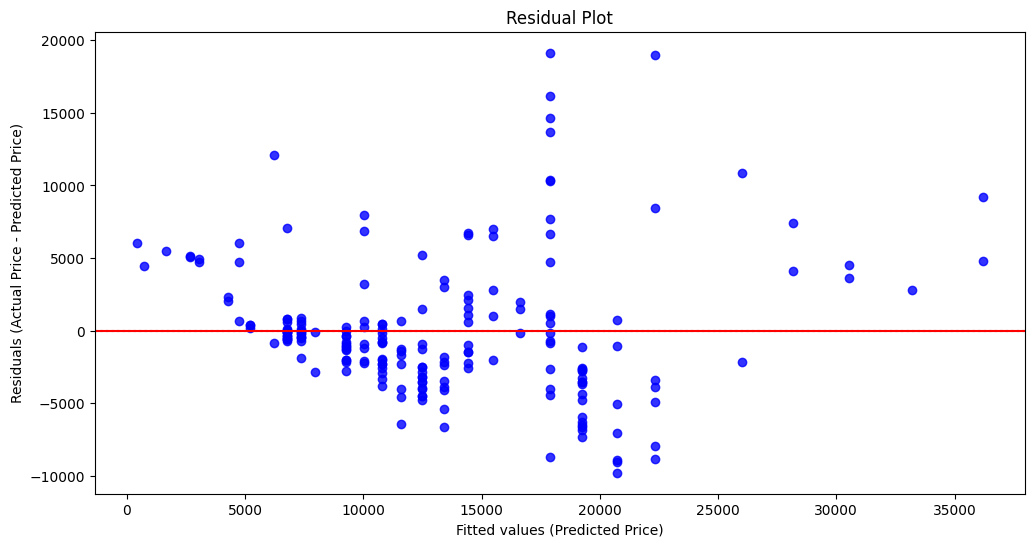

In [113]:
# Calculate the residuals (the difference between actual and predicted prices)
residuals = df['price'] - Yhat

# Create a residual plot using seaborn's residplot
plt.figure(figsize=(12, 6))
sns.residplot(x=Yhat,y= residuals,color='b')
plt.xlabel("Fitted values (Predicted Price)")
plt.ylabel("Residuals (Actual Price - Predicted Price)")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


C:\Users\Mann\AppData\Local\Temp\ipykernel_23028\3761507791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df['price'],hist=False,color="r",label=("Actual Values"))
C:\Users\Mann\AppData\Local\Temp\ipykernel_23028\3761507791.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

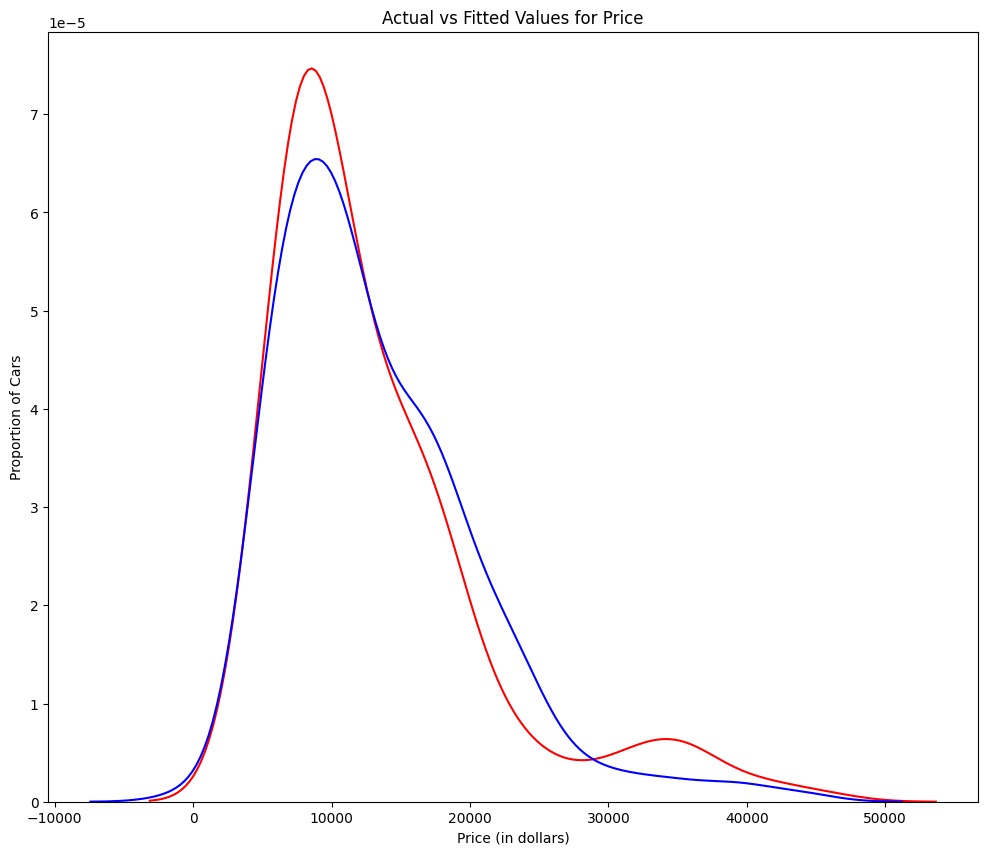

In [114]:
plt.figure(figsize=(width,height))

ax1= sns.distplot(df['price'],hist=False,color="r",label=("Actual Values"))
sns.distplot(yhat,hist=False,color='b', label='Fitted values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>3. Polynomial Regression and Pipelines</h2>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$
<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [115]:
def PlotPolly(model, indepedent_variable, dependent_variable, Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    
    plt.plot(indepedent_variable,dependent_variable,".",x_new,y_new,"-")
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax= plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close()

In [116]:
x=df['highway-L/100km']
y=df['price']


In [117]:
#fit the polynomial using polyfit, then use the function poly1d to display the polynomial function
f=np.polyfit(x,y,3)
p=np.poly1d

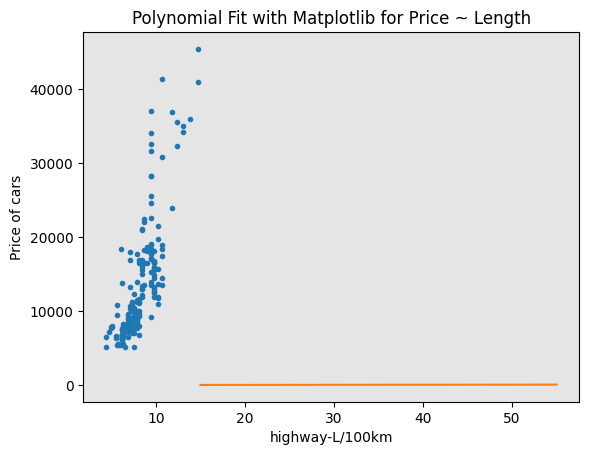

In [118]:
PlotPolly(p,x,y,"highway-L/100km")

We can perform polynomial transform on multiple features.

In [120]:
from sklearn.preprocessing import PolynomialFeatures

# we create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)

Z_pr = pr.fit_transform(Z)
Z.shape

(201, 5)

In [121]:
Z_pr.shape

(201, 21)

<h2>Pipeline</h2>
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [123]:
Input= [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to float to avoid conversion warnings that may appear as a result of Standard scaler taking float inputs.
Then we can normalize the data, perform a transform and fit the model simultaneously.

In [124]:
Z

,horsepower,curb-weight,engine-size,highway-L/100km,normalized-losses
0,111,2548,130,8.703704,122
1,111,2548,130,8.703704,122
2,154,2823,152,9.038462,122
3,102,2337,109,7.833333,164
4,115,2824,136,10.681818,164
...,...,...,...,...,...
196,114,2952,141,8.392857,95
197,160,3049,141,9.400000,95
198,134,3012,173,10.217391,95
199,106,3217,145,8.703704,95


In [125]:
Z.dtypes

horsepower             int32
curb-weight            int64
engine-size            int64
highway-L/100km      float64
normalized-losses      int32
dtype: object

In [128]:
Z=Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [129]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12305.96783072, 12305.96783072, 18752.95989967, 10288.42017677])

In [132]:
Input2=[('scaler',StandardScaler()),'model',LinearRegression()]

pipe2=Pipeline(Input)
pipe2.fit(Z,y)
ypipe2=pipe.predict(Z)
ypipe2[0:4]

array([12305.96783072, 12305.96783072, 18752.95989967, 10288.42017677])

<h2>4. Measures for In-Sample Evaluation</h2>
<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>



In [137]:
# Model 1: Simple Linear Regression

lm.fit(X,Y)
lm.score(X,Y)

0.7609686443622008

In [138]:
Yhat=lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
mse=mean_squared_error(df['price'],Yhat)
mse

15021126.02517414

Model 2: Multiple Linear Regression

In [142]:
lm.fit(Z,df['price'])
lm.score(Z,df['price'])

0.8118197239278412

In [143]:
Y_predict_multifit=lm.predict(Z)

In [144]:
mean_squared_error(df['price'],Y_predict_multifit)

11825560.01822283

Model 3: Polynomila Fit

In [146]:
from sklearn.metrics import r2_score

r2_squared=r2_score(y,p(x))
r2_squared

ValueError: Found input variables with inconsistent numbers of samples: [201, 200]